REGRESIONES LINEALES PARA EL LAB 2
---

Descarga de librerias y lectura de datos para R1
---

In [90]:
# El formato de archivo es de jupiter (".ipynb") 
# Descarga de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm 

# Lectura de los datos, en este caso en formato ".csv"
DATOS = pd.read_csv("/workspaces/First-repository/LAB 2/Lab 2_ Excel - Resistencia 1.csv")
# Elimino una columna vacia
DATOS = DATOS.drop (columns = "Unnamed: 2")
# Muestra los datos en formato de dataframe de pandas (primer libreria importada)
DATOS 
# Aclaración: Gracias a jupiter no se necesita el comando "print()", ya lo sobre entiende jupiter para la última linea de código
# Si lo trabajaras con el formato de archivo de pyton (".py") si sería necesario el "print()"


,Tiempo s Carga,Voltaje V Carga,Tiempo s Descarga,Voltaje V Descarga
0,0.10,1.97,0.01,1.47
1,0.50,1.95,1.05,1.45
2,1.00,1.93,2.18,1.40
3,2.00,1.88,4.18,1.35
4,3.14,1.83,6.03,1.30
5,4.26,1.77,8.03,1.25
6,6.10,1.71,9.21,1.20
7,7.18,1.65,11.15,1.15
8,9.06,1.60,13.14,1.10
9,10.24,1.54,15.25,1.05


RESISTENCIA 1 EN CARGA
---

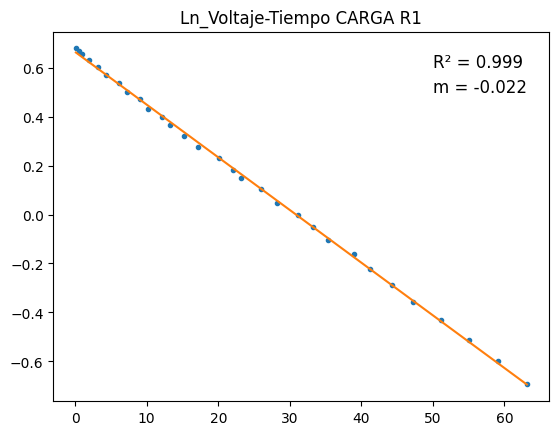

In [91]:
# Áca se selecciona las columnas de interes, "Tiempo s Carga" y "Voltaje V Carga" 
# Y se cambia su formato para numpy (La segunda libreria) se denominan array/s, distintos de pandas con sus dataframes
# Este formato de pandas son algo como listas de números o de textos (Esos ya no se como funcionan :p)
# Primero se pone la variable independiente y luego la dependiente
datos = DATOS[["Tiempo s Carga","Voltaje V Carga"]].to_numpy()
# Acá se les aplica el logaritmo natural a los datos de "Voltaje V Carga" ([:,1] <-- posición 1 en el arrays para la variable dependiente) y pasan a llamarse "datos_lin"
datos_lin = np.log(datos[:,1])
# Acá viene la regresión ([:,0] <-- Posición 0 en el arrays refiriendose a la independiente) , se hace con la cuarta libreria de scipy/stats
regresion = stats.linregress(datos[:,0],datos_lin)
# Hecha la regresión, se construye la gráfica con la tercer libreria "plt"
# Por otro lado, de la "regresion" se puede obtener el valor de R y nosotros le sacamos el cuadrado
R = regresion.rvalue
R2 = R ** 2
# Áca ponemos el valor de R² en la gráfica, plt.text(Posición en x, posición en y, texto, "fontsize=" tamaño letra , ¿color =?)
plt.text(50,0.6,f'R² = {R2:.3f}',fontsize = 12 , color = "black")
# Agregando la pendiente
m = regresion.slope
plt.text(50,0.5,f'm = {m:.3f}',fontsize = 12 , color = "black")
# [:,0] la independiente, datos_lin la dependiente , "ls=" no se que hace 
plt.plot(datos[:,0],datos_lin,ls="", marker = ".")
# Acá junta la regresión con la gráfica anterior
plt.plot(datos[:,0],regresion.slope*datos[:,0]+regresion.intercept)
# El título
Titulo = "Ln_Voltaje-Tiempo CARGA R1"
plt.title(Titulo)
# Guarda la imagen ".png" con nombre "Titulo" y calidad "dpi = 300"
plt.savefig(Titulo, dpi = 300)
# El equivalente a "print()" para gráficas
plt.show()


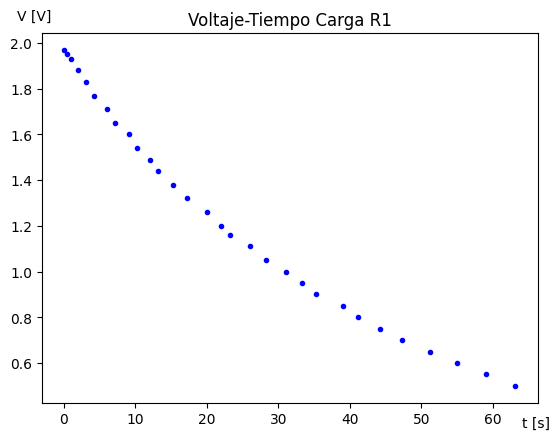

In [92]:
plt.plot(datos[:,0],datos[:,1],ls="", marker = ".", color = "blue", label = "No Ln")
Titulo = "Voltaje-Tiempo Carga R1"
plt.title(Titulo)
plt.text(-6.5,2.1,"V [V]")
plt.text(64,0.32,"t [s]")
plt.show()

RESISTENCIA 1 EN DESCARGA
--- 
Mismo analisis anterior pero sin los comentarios

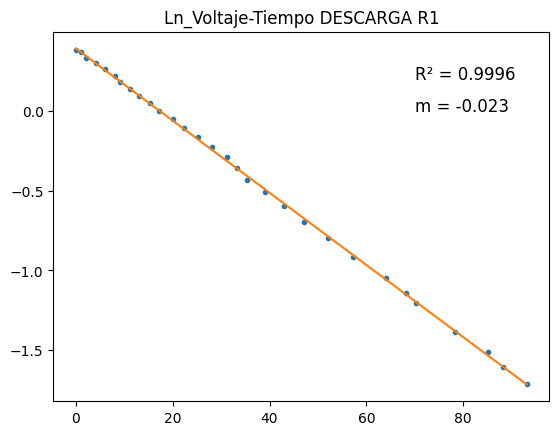

In [93]:
datos = DATOS[["Tiempo s Descarga","Voltaje V Descarga"]].to_numpy()
datos_lin = np.log(datos[:,1])
regresion = stats.linregress(datos[:,0],datos_lin)
R = regresion.rvalue
R2 = R ** 2
plt.text(70,0.2,f'R² = {R2:.4f}',fontsize = 12 , color = "black")
m = regresion.slope
plt.text(70,0,f'm = {m:.3f}',fontsize = 12 , color = "black")
plt.plot(datos[:,0],datos_lin,ls="", marker = ".")
plt.plot(datos[:,0],regresion.slope*datos[:,0]+regresion.intercept)
Titulo = "Ln_Voltaje-Tiempo DESCARGA R1"
plt.title(Titulo)
plt.savefig(Titulo, dpi = 300)
plt.show()


ESTA PARTE PUEDE IGNORARSE, A MENOS QUE TENGAS CONOCIMIENTO AVANZADOS DE ESTADÍSTICA


In [94]:
X = sm.add_constant(DATOS["Tiempo s Descarga"])

model = sm.OLS(datos_lin, X).fit()
print(model.summary())

r_squared = model.rsquared
print(f'R²: {r_squared}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.894e+04
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           7.43e-50
Time:                        00:15:57   Log-Likelihood:                 90.098
No. Observations:                  30   AIC:                            -176.2
Df Residuals:                      28   BIC:                            -173.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3940      0.00

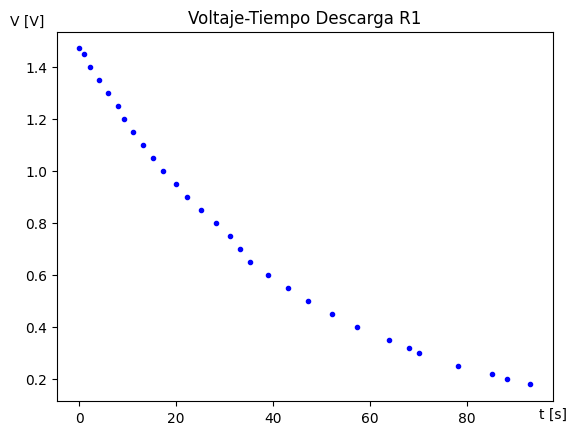

In [95]:
plt.plot(datos[:,0],datos[:,1],ls="", marker = ".", color = "blue", label = "No Ln")
Titulo = "Voltaje-Tiempo Descarga R1"
plt.title(Titulo)
plt.text(-14.3,1.56,"V [V]")
plt.text(95,0.05,"t [s]")
plt.show()

Lectura de Datos R2
---

In [96]:
DATOS = pd.read_csv("/workspaces/First-repository/LAB 2/Lab 2_ Excel - Resistencia 2.csv")
# Elimino una columna vacia
DATOS = DATOS.drop (columns = "Unnamed: 2")
# Muestra los datos en formato de dataframe de pandas (primer libreria importada)
DATOS 

,Tiempo s Carga,Voltaje V Carga,Tiempo s Descarga,Voltaje V Descarga
0,0.3,2.00,0.01,1.50
1,8.0,1.95,12.00,1.46
2,20.0,1.90,25.00,1.42
3,32.0,1.85,39.00,1.38
4,45.0,1.80,53.00,1.34
5,59.0,1.75,66.00,1.30
6,72.0,1.70,81.00,1.26
7,87.0,1.65,89.00,1.24
8,101.0,1.60,96.00,1.22
9,117.0,1.55,112.00,1.18


RESISTENCIA 2 EN CARGA
---

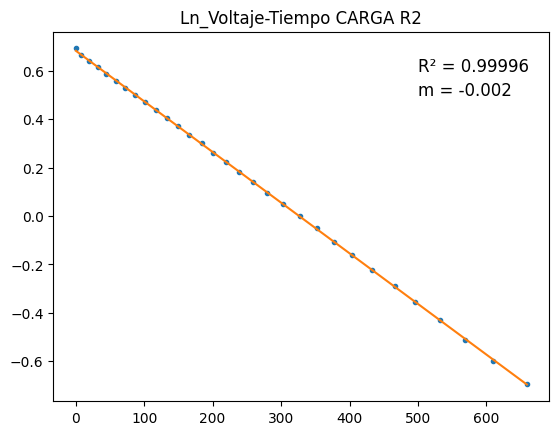

In [97]:
datos = DATOS[["Tiempo s Carga","Voltaje V Carga"]].to_numpy()
datos_lin = np.log(datos[:,1])

regresion = stats.linregress(datos[:,0],datos_lin)

R = regresion.rvalue
R2 = R ** 2

plt.text(500,0.6,f'R² = {R2:.5f}',fontsize = 12 , color = "black")

m = regresion.slope
plt.text(500,0.5,f'm = {m:.3f}',fontsize = 12 , color = "black")

plt.plot(datos[:,0],datos_lin,ls="", marker = ".")
plt.plot(datos[:,0],regresion.slope*datos[:,0]+regresion.intercept)

Titulo = "Ln_Voltaje-Tiempo CARGA R2"
plt.title(Titulo)
plt.savefig(Titulo, dpi = 300)
plt.show()

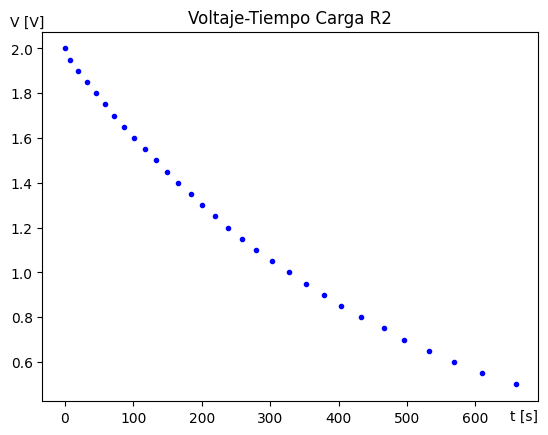

In [98]:
plt.plot(datos[:,0],datos[:,1],ls="", marker = ".", color = "blue", label = "No Ln")
Titulo = "Voltaje-Tiempo Carga R2"
plt.title(Titulo)
plt.text(-80,2.1,"V [V]")
plt.text(650,0.34,"t [s]")
plt.show()

RESISTENCIA 2 EN DESCARGA
---

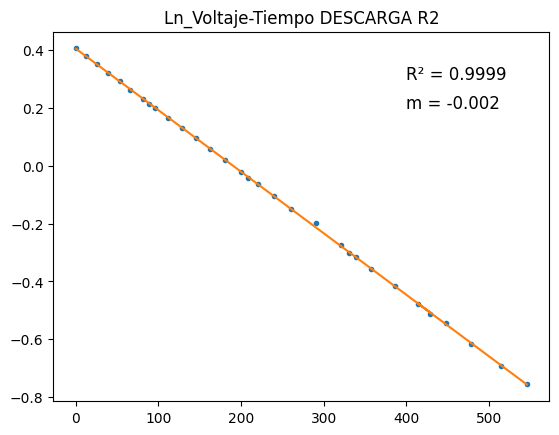

In [99]:
datos = DATOS[["Tiempo s Descarga","Voltaje V Descarga"]].to_numpy()
datos_lin = np.log(datos[:,1])
regresion = stats.linregress(datos[:,0],datos_lin)

R = regresion.rvalue
R2 = R ** 2
plt.text(400,0.3,f'R² = {R2:.4f}',fontsize = 12 , color = "black")

m = regresion.slope
plt.text(400,0.2,f'm = {m:.3f}',fontsize = 12 , color = "black")

plt.plot(datos[:,0],datos_lin,ls="", marker = ".")
plt.plot(datos[:,0],regresion.slope*datos[:,0]+regresion.intercept)
Titulo = "Ln_Voltaje-Tiempo DESCARGA R2"
plt.title(Titulo)
plt.savefig(Titulo, dpi = 300)
plt.show()

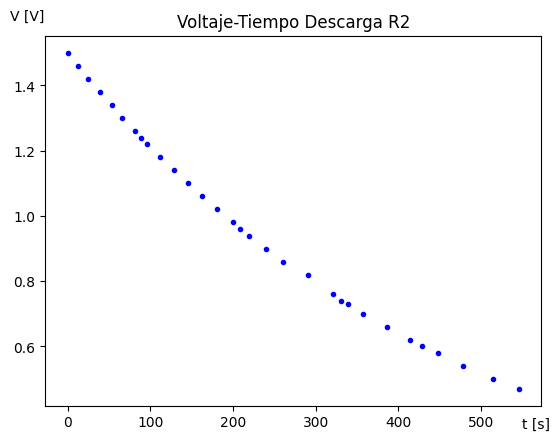

In [100]:
plt.plot(datos[:,0],datos[:,1],ls="", marker = ".", color = "blue", label = "No Ln")
Titulo = "Voltaje-Tiempo Descarga R2"
plt.title(Titulo)
plt.text(-70,1.6,"V [V]")
plt.text(550,0.35,"t [s]")
plt.show()
